In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [31]:
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library to perform tsne
from sklearn.manifold import TSNE
#Library for finding mode
from scipy import stats
#inbuilt KNeighbours
from sklearn.neighbors import KNeighborsClassifier
#Library to measure accuracy
from sklearn.metrics import accuracy_score

### **A part**

**Loading the Dataset**

In [9]:
#Loading the train and test Dataset
data_train = pd.read_csv('/content/sat.trn',header = None,delimiter = " ")
data_test = pd.read_csv('/content/sat.tst',header = None,delimiter = " ")
#Keeping the Names of the Columns for both Dataset
col = ['pixel'+ str(i) for i in range(36)]
col.append('Class')
data_train.columns = col
print("Train dataset")
print(data_train)
print("\nTest dataset")
data_test.columns = col
print(data_test)
#Printing the shape of the Dataset
print("Shape of the Train Dataset ", data_train.shape)
print("Shape of the Test Dataset ", data_test.shape)
print("\nUnique Classes")
print(data_train['Class'].unique())

Train dataset
      pixel0  pixel1  pixel2  pixel3  ...  pixel33  pixel34  pixel35  Class
0         92     115     120      94  ...      107      113       87      3
1         84     102     106      79  ...       99      104       79      3
2         84     102     102      83  ...       99      104       79      3
3         80     102     102      79  ...      103      104       79      3
4         84      94     102      79  ...      107      109       87      3
...      ...     ...     ...     ...  ...      ...      ...      ...    ...
4430      56      64     108      96  ...       87      104       89      5
4431      64      71     108      96  ...       87      104       89      5
4432      68      75     108      96  ...      100      104       85      4
4433      71      87     108      88  ...       91      104       85      4
4434      71      91     100      81  ...       91      100       81      4

[4435 rows x 37 columns]

Test dataset
      pixel0  pixel1  pixel2  pixe

**TSNE plot**

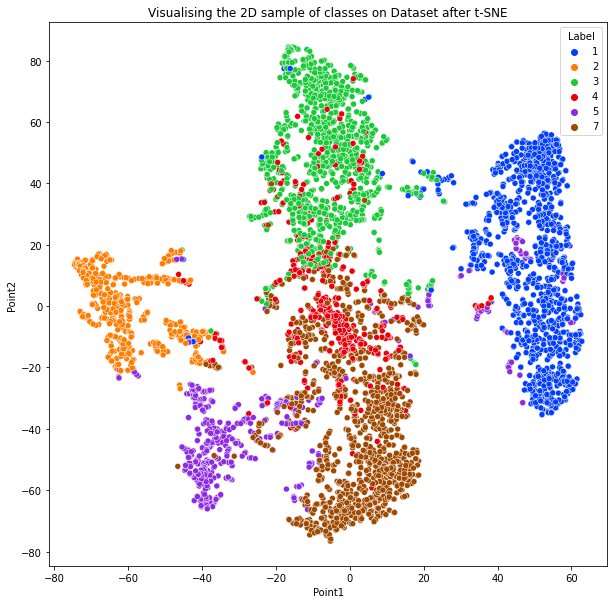

In [8]:
def Question1a(data_train):
  #Using t-SNE to reduce to 2 dimensions
  tsne_2d = TSNE(n_components = 2,random_state=0)
  X_2d = tsne_2d.fit_transform(data_train.iloc[:,:-1])
  #Keeping the 2 points as there are 2 dimensions 
  pointx = X_2d[:,0]
  pointy = X_2d[:,1]
  #Storing the Label data
  label = data_train['Class']
  #Making a dataframe of the 2 points and labels
  dataframe_1c = pd.DataFrame(list(zip(pointx,pointy,label)), columns=["Pointx","Pointy","Label"])
  #Creating a figure of size 10*10
  plt.figure(figsize=(10,10))
  #Taking 10 colours for printing each class
  palette = sns.color_palette("bright", 6) 
  #Plotting the scatterplot for 2 Points using seaborn
  sns.scatterplot(data=dataframe_1c, x="Pointx",y="Pointy",hue = "Label",legend='full',palette=palette)
  #Labelling the Plot
  plt.xlabel('Point1')
  plt.ylabel('Point2')
  plt.title("Visualising the 2D sample of classes on Dataset after t-SNE")
  plt.show()

Question1a(data_train)

In [14]:
#Splitting the Dataset other than the Target Value
X_train = data_train.loc[ : , data_train.columns != 'Class']
print("The X_train ")
print(X_train)

#Storing the Target Value 
y_train = data_train.iloc[:,-1]
y_train.columns = ["Class"]
print("\nThe y_train ")
print(y_train)

The X_train 
      pixel0  pixel1  pixel2  pixel3  ...  pixel32  pixel33  pixel34  pixel35
0         92     115     120      94  ...       84      107      113       87
1         84     102     106      79  ...       84       99      104       79
2         84     102     102      83  ...       84       99      104       79
3         80     102     102      79  ...       84      103      104       79
4         84      94     102      79  ...       79      107      109       87
...      ...     ...     ...     ...  ...      ...      ...      ...      ...
4430      56      64     108      96  ...       66       87      104       89
4431      64      71     108      96  ...       63       87      104       89
4432      68      75     108      96  ...       70      100      104       85
4433      71      87     108      88  ...       70       91      104       85
4434      71      91     100      81  ...       63       91      100       81

[4435 rows x 36 columns]

The y_train 
0       3
1

In [15]:
#Storing the Values of the Test Dataset other than the Target Value
X_test = data_test.loc[ : , data_test.columns != 'Class']
print("The X_test")
print(X_test)

#Storing the Target Value 
y_test = data_test.iloc[:,-1]
y_test.columns = ["Class"]
print("\nThe y_test ")
print(y_test)

The X_test
      pixel0  pixel1  pixel2  pixel3  ...  pixel32  pixel33  pixel34  pixel35
0         80     102     102      79  ...       79      107      113       87
1         76     102     102      79  ...       79      103      104       83
2         80      98     106      79  ...       79       95       96       75
3         76      94     102      76  ...       79       95      100       75
4         76      94     102      76  ...       75       95      100       79
...      ...     ...     ...     ...  ...      ...      ...      ...      ...
1995      60      83      96      85  ...       63       83      104       85
1996      64      79     100      85  ...       63       83      100       81
1997      56      68      91      81  ...       63       83       92       74
1998      56      68      87      74  ...       59       83       92       70
1999      60      71      91      81  ...       63       79      108       92

[2000 rows x 36 columns]

The y_test 
0       3
1   

### **B part**

In [16]:
#Function to find the Euclidean Distance
def find_distance(train,test):
  dist = 0.0
  train = np.array(train)
  test = np.array(test)
  dist = np.sqrt(np.sum(np.power((train-test),2)))
  return dist

In [17]:
#Function to find the error
def find_error(pred,actual):
  pred = np.array(pred).reshape(len(pred),1)
  actual = np.array(actual).reshape(len(actual),1)
  err = pred-actual
  val = (err != 0).sum()

  #Calculate the error
  error = val/actual.shape[0]
  return error*100

In [52]:
#Function to find the K Nearest Neighbours
def knn(datatr_x,datate_x, datatr_y, datate_y,k_val):
  #Storing the predicted values 
  pred = []
  #Iterating over test data
  for i in range(datate_x.shape[0]):
    #Storing the distance of each test data with the training instances
    dist = {}
    for j in range(datatr_x.shape[0]):
      #Finding the euclidean distance
      dist[datatr_y[j]] = find_distance(datatr_x.iloc[j], datate_x.iloc[i])
    #Sorting the distances in ascending order
    sorted_dist = sorted(dist.items(),key=lambda x: x[1])
    #Taking the K neighbours Class values
    k_neighbour = []
    for k in range(1,k_val+1):
      k_neighbour.append(list(sorted_dist)[k][0])
    #Taking the mode of the values from the k neighbours
    pred.append(stats.mode(k_neighbour)[0][0])
  return pred

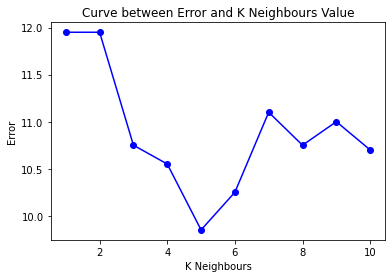

      K  Testing Error
0   1.0          11.95
1   2.0          11.95
2   3.0          10.75
3   4.0          10.55
4   5.0           9.85
5   6.0          10.25
6   7.0          11.10
7   8.0          10.75
8   9.0          11.00
9  10.0          10.70

The optimal value of k is  5


In [32]:
def grid_search(X_train, X_test, y_train, y_test):
  #Storing the errors
  error = []
  #Making a dataframe
  columns_names = ["K","Testing Error"]
  Q1_b = pd.DataFrame(columns = columns_names)
  #Minimum error and optimal k storing variables
  min_error = 100
  opt_k = 0
  #performing grid search over the value of k
  for k in range(1,11):
    #Calling knn function for each k
    pred = knn(X_train, X_test, y_train, y_test,k)
    #Finding the error
    error_val = find_error(pred,y_test)
    #Finding the optimal k
    if(error_val < min_error):
      min_error = error_val
      opt_k = k
    error.append(error_val)
    Q1_b = Q1_b.append({'K':k,'Testing Error':error_val},ignore_index=True)
  #Plotting the graph
  fig2=plt.plot(range(1,11),error,marker='o',color='b')
  plt.xlabel('K Neighbours')
  plt.ylabel('Error')
  plt.title("Curve between Error and K Neighbours Value")
  plt.show()
  print(Q1_b)
  print("\nThe optimal value of k is ", opt_k)
  return opt_k

optimal_k = grid_search(X_train, X_test, y_train, y_test)

### **C part**

In [37]:
def Question1c_inbuilt(X_train, X_test, y_train, y_test, optimal_k):
  #Implementing the KNN function
  knn = KNeighborsClassifier(n_neighbors = optimal_k, metric = 'euclidean')
  #Fitting the model
  knn.fit(X_train, y_train)
  #Predicting Values
  pred_train = knn.predict(X_train)
  pred_test = knn.predict(X_test)
  #Finding Accuracy
  print("Training Accuracy from inbuilt function ", accuracy_score(pred_train,y_train)*100)
  print("Validation Accuracy from inbuilt function ", accuracy_score(pred_test,y_test)*100)

Question1c_inbuilt(X_train, X_test, y_train, y_test, optimal_k)

Training Accuracy from inbuilt function  94.11499436302142
Validation Accuracy from inbuilt function  90.45


In [51]:
def Question1c_implement(X_train, X_test, y_train, y_test, optimal_k):
  #Implementing the KNN function
  pred_train = knn(X_train, X_train, y_train, y_train,optimal_k)
  pred_test = knn(X_train, X_test, y_train, y_test,optimal_k)
  #Finding Accuracy
  print("Training Accuracy from implemented function ", accuracy_score(pred_train,y_train)*100)
  print("Validation Accuracy from implemented function ", accuracy_score(pred_test,y_test)*100)

Question1c_implement(X_train, X_test, y_train, y_test, optimal_k)

Training Accuracy from implemented function 94.1000233
Validation Accuracy from implemented function 90.267
